# 비정형 데이터마이닝

In [14]:
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [2]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

1.&nbsp; '영화 기생충_review.txt' 데이터를 읽어온 뒤 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오. 그리고 '영화 기생충_사전.txt'을 사전에 등록하시오.

In [3]:
data_path = "/hdd/data/adp_data/영화 기생충_review.txt"

def preprocess_text(file_path):
    with open(file_path, 'r', encoding = 'cp949') as file:
        text = file.readlines()
    
    clean_text = list(map(lambda x: re.sub(r'[^가-힣\s]', '', x.strip()), text))

    return clean_text

cleaned_review_text = preprocess_text(data_path)
print(cleaned_review_text[:5])

['별개  준 사람들은   나베당임', '역쉬', '영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다', '지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음  ', '대단한 영화 몰입력 장난아님 후아']


In [12]:
dict_path = "/hdd/data/adp_data/영화 기생충_사전.txt"

def load_user_dict(file_path):
    with open(file_path, 'r', encoding = 'cp949') as file:
        user_words = [line.strip() for line in file.readlines()]
        return user_words

user_words = load_user_dict(dict_path)
print(user_words[:5])

['기생충', '봉준호', '송강호', '기택', '이선균']


2.&nbsp; '영화 기생충_사전.txt'를 단어 사전으로 하는 TDM을 구축하고 빈도를 파악하고 시각화하시오.

{'봉준호': 129, '기생충': 61, '송강호': 57, '이선균': 25, '조여정': 24, '최우식': 12, '이정은': 11, '박소담': 5, '기우': 3, '박사장': 2, '장혜진': 1, '기정': 1, '기택': 1}


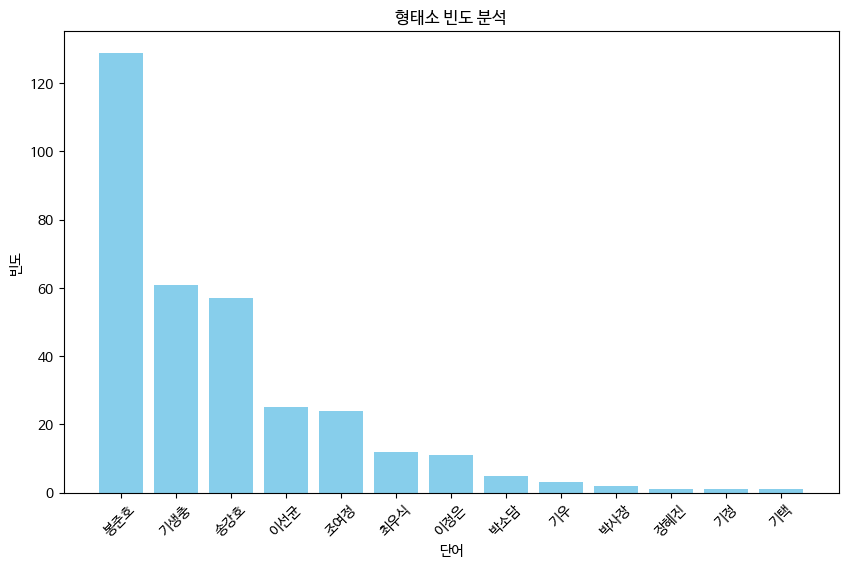

In [13]:
def analyze_word_frequency(texts, user_words):
    word_freq = {}

    for text in texts:
        for word in user_words:
            if word in text:
                if word not in word_freq:
                    word_freq[word] = 1
                else:
                    word_freq[word] += 1
    
    return word_freq

word_freq = analyze_word_frequency(cleaned_review_text, user_words)

word_freq_sorted = dict(sorted(word_freq.items(), key = lambda item: item[1], reverse = True))
print(word_freq_sorted)

df = pd.DataFrame(list(word_freq_sorted.items()), columns = ['Word', 'Frequency'])

plt.figure(figsize = (10, 6))
plt.bar(df['Word'], df['Frequency'], color = 'skyblue')
plt.xlabel('단어')
plt.ylabel('빈도')
plt.title('형태소 빈도 분석')
plt.xticks(rotation = 45)
plt.show()

3.&nbsp; extraNoun으로 명사를 추출하여 워드클라우드를 그리고 특성을 파악하시오.

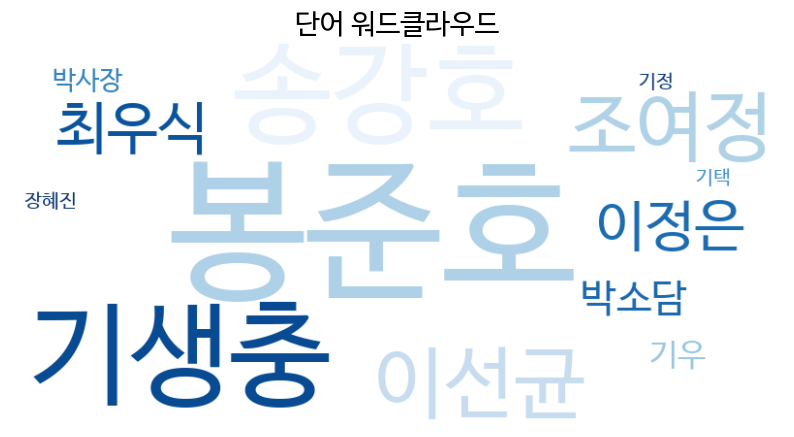

In [15]:
wordcloud = WordCloud(
    font_path = font_path,
    background_color = 'white',
    width = 800,
    height = 400,
    max_words = 100,
    colormap = 'Blues'
).generate_from_frequencies(word_freq_sorted)

plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('단어 워드클라우드', fontsize = 20)
plt.show()